In [3]:
from ML.CNN.data_loader import load_data_qg_tagging
from keras import Sequential
from utilities import utilities
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import keras

#### Loading the data 

In [7]:
X_train, y_train = load_data_qg_tagging(
    quark_data_path="../../Data/Trainning/q_jets.csv", gluon_data_path="../../Data/Trainning/g_jets.csv",
    eta_range=(-0.4, 0.4), phi_range=(-0.4, 0.4), n_eta_bins=16, n_phi_bins=16
)

X_val, y_val = load_data_qg_tagging(
    quark_data_path="../../Data/Validation/q_jets.csv", gluon_data_path="../../Data/Validation/g_jets.csv",
    eta_range=(-0.4, 0.4), phi_range=(-0.4, 0.4), n_eta_bins=16, n_phi_bins=16
)

#### Setting up the NN

In [8]:
regularization_rate = 10**(-8)
dropout_rate = 0.3

model = Sequential()
model.add(Input(shape=(16, 16, 1)))

model.add(Conv2D(filters = 128 , kernel_size=(5, 5), padding = "same", activation='relu',kernel_regularizer=l2(regularization_rate)))
model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(filters = 128 , kernel_size=(5, 5), padding = "same", activation='relu',kernel_regularizer=l2(regularization_rate)))
model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(filters = 64 , kernel_size=(3, 3), padding = "same", activation='relu',kernel_regularizer=l2(regularization_rate)))
model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(dropout_rate))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(regularization_rate)))
model.add(Dropout(dropout_rate))

model.add(Dense(2, activation='softmax'))


learning_rate = 0.0001

optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy','auc'])

In [9]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,002 (1.98 MB)

 Trainable params: 520,002 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
callbacks = [keras.callbacks.ModelCheckpoint(
        filepath = "model/QG_Tag_Model_3.keras",
        save_best_only=True,
        monitor = 'val_loss',
                    )]

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, batch_size=128)

Epoch 1/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 132s 65ms/step - accuracy: 0.6463 - auc: 0.7008 - loss: 0.6248 - val_accuracy: 0.7303 - val_auc: 0.8003 - val_loss: 0.5498
Epoch 2/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 127s 65ms/step - accuracy: 0.7262 - auc: 0.7874 - loss: 0.5579 - val_accuracy: 0.7445 - val_auc: 0.8217 - val_loss: 0.5253
Epoch 3/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.7396 - auc: 0.8114 - loss: 0.5322 - val_accuracy: 0.7431 - val_auc: 0.8167 - val_loss: 0.5253
Epoch 4/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 129s 66ms/step - accuracy: 0.7527 - auc: 0.8276 - loss: 0.5124 - val_accuracy: 0.7653 - val_auc: 0.8422 - val_loss: 0.4989
Epoch 5/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 129s 65ms/step - accuracy: 0.7594 - auc: 0.8349 - loss: 0.5031 - val_accuracy: 0.7675 - val_auc: 0.8488 - val_loss: 0.4840
Epoch 6/50
1964/1964 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.7631 - auc: 0.8382 - loss: 0.4987 - val_accuracy: 0.7737 - val_auc: 0.8522 - val_loss: 0.4860
Epoch 7/50

In [11]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

7856/7856 ━━━━━━━━━━━━━━━━━━━━ 57s 7ms/step
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step


In [12]:
print("Trainnig set:")
utilities.display_metrics(y_true=y_train[:, 0], y_pred=y_train_pred[:, 0] > 0.5)
print("Validation set:")
utilities.display_metrics(y_true=y_val[:, 0], y_pred=y_val_pred[:, 0] > 0.5)

Trainnig set:
Recall: 0.6697
Precision: 0.8620
Confusion Matrix:
[[114842  13222]
 [ 40737  82578]]
Validation set:
Recall: 0.6682
Precision: 0.8571
Confusion Matrix:
[[20175  2425]
 [ 7221 14541]]


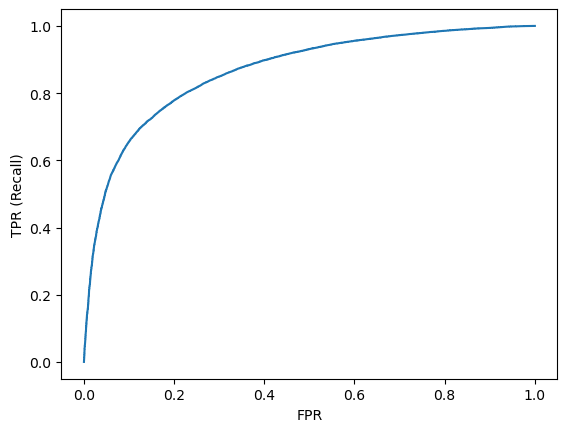

AUC: 0.8668


In [13]:
utilities.display_roc_curve(y_true=y_val[:, 0], y_score=y_val_pred[:, 0])

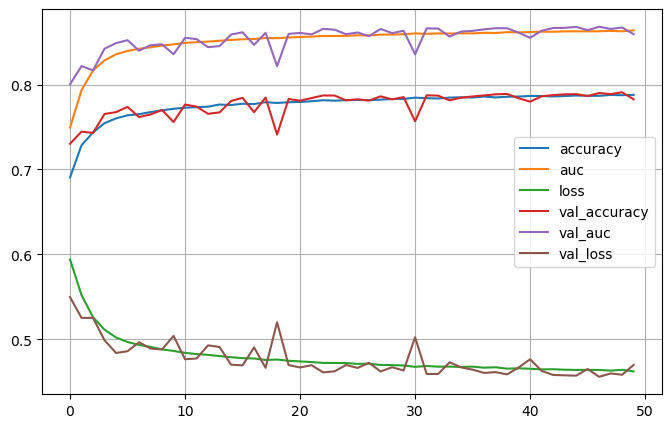

In [14]:
utilities.plot_hist_trainning(history)

In [15]:
utilities.save_model(model, history, "Quark_Gluon_Tagging_CNN")